<h2>Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Rectangle

<h2>Text Properties

In [8]:
font_title = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'70', 'weight':'bold'}
font_anno_dark = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'25'}
font_anno_dark_small = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'15'}
font_anno_light = {'fontname' : 'din condensed', 'color' : 'oldlace', 'size' : '35'}
font_anno_light_small = {'fontname' : 'din condensed', 'color' : 'oldlace', 'size' : '25'}
font_background = {'fontname' : 'din condensed', 'color' : 'white', 'size' : '135'}
font_sankey = {'fontname' : 'din condensed', 'color' : 'white', 'size' : '25', 
               'path_effects': [PathEffects.withStroke(linewidth=3, foreground='b')]}
rect_prop = {'color': '#79F10E', 'alpha': 0.2, 'zorder': 1}

<h2>Plot

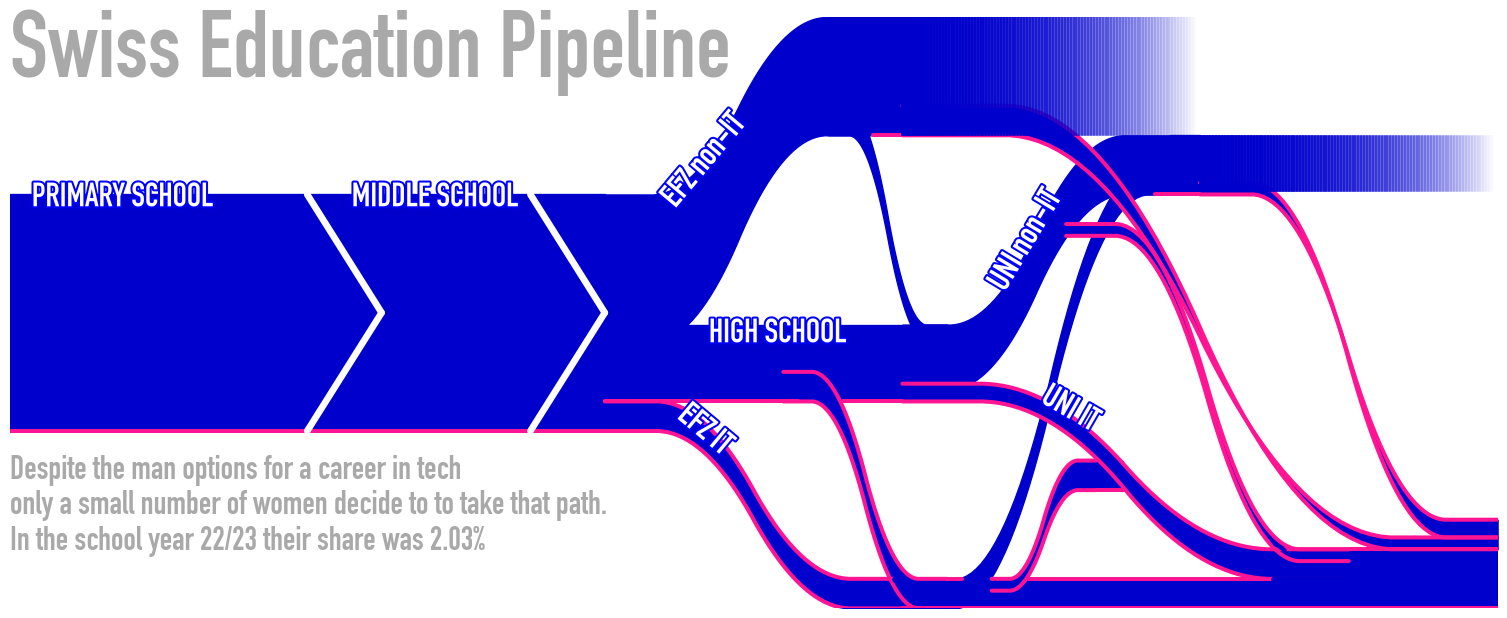

In [9]:
f, ax = plt.subplots(figsize=(20, 8), dpi=96)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

"""the sankey plot technically consists of 2 different elements: the actual sankey-curve, and rectangles that 
fill the space in the beginning and end of the curve. This give the user more control over the overall appearance """

# RECTANGLES
common_props = {'facecolor': 'mediumblue', 'edgecolor': 'mediumblue'}
rectangle_helper = {
    'primary': {'xy': (0, 3), 'width': 2, 'height': 4},
    'middle': {'xy': (2, 3), 'width': 2, 'height': 4},
    'efz_nonIT': {'xy': (5.8, 8), 'width': 0.2, 'height': 3},
    'efz_IT': {'xy': (6.3, 0), 'width': 10, 'height': 0.5},
    'efz_helper': {'xy': (7.3, 2), 'width': 0.18, 'height': 0.5},
    'high': {'xy': (4, 3.5), 'width': 2, 'height': 1.3},
    'uni_nonIT': {'xy': (7.8, 7), 'width': 0.2, 'height': 1},
    'uni_IT': {'xy': (9, 0.5), 'width': 1, 'height': 0.5}
}

# SANKEY COORDINATES
sankey_curves = { # blue lines going upwards/disappearing
    'sankey_curve': [
        [7, 10, 4.5, 8, 4, 5.8],
        [4.8, 8, 3.7, 7, 6, 7.8],
        [0.5, 7.5, 0, 7, 6, 8],
        [8.5, 4.8, 8, 4.5, 5.5, 6.3]
    ],
    'sankey_curve_IT': [ # pink lines going downwards
        [3.5, 0.5, 3, 0, 4, 6],
        [0.5, 2.5, 0.3, 2, 6.6, 7.3],
        [3.8, 1, 3.5, 0.5, 6, 9],
        [8.5, 1, 8, 1.2, 6, 10],
        [7.2, 1.2, 7, 1.5, 8, 10],
        [4, 0.5, 3.5, 0, 5.2, 6.3],
        [6.5, 1, 6.3, 0.8, 7.1, 9]
    ]
}

# HELPER LINES PROPERTIES
highlight_it_props = {'color': 'deeppink', 'linewidth': 3} # line highlight
fix_highlight_props = {'color': 'mediumblue', 'zorder': 10} # cover highlight for appearance reasons

# HELPER LINES PINK
highlight_it_lines = [
    {'x': [0, 4], 'y': [3, 3]},
    {'x': [4, 5.3], 'y': [3.5, 3.5]},
    {'x': [5.6, 6], 'y': [3.5, 3.5]},
    {'x': [6.85, 8.5], 'y': [0.5, 0.5]},
    {'x': [9, 10], 'y': [1, 1]},
    {'x': [7.7, 8], 'y': [7, 7]},
    {'x': [5.8, 6], 'y': [8, 8]},
    {'x': [7.3, 7.49], 'y': [2, 2]},
    {'x': [6.3, 6.4], 'y': [0.5, 0.5]},
    {'x': [6, 12], 'y': [0, 0]}
]

# HELPER LINES BLUES
fix_highlight_lines = [
    {'x': [5.95, 6], 'y': [0.5, 0.5], 'linewidth': 5},
    {'x': [8.5, 9], 'y': [0.5, 0.5], 'linewidth': 5},
    {'x': [8.5, 8.57], 'y': [1.1, 0.98], 'linewidth': 3}
]

# SANKEY ANNOTATION
text_properties = [
    {'x': 0.15, 'y': 6.8, 'text': 'PRIMARY SCHOOL', 'rotation': 0},
    {'x': 2.30, 'y': 6.8, 'text': 'MIDDLE SCHOOL', 'rotation': 0},
    {'x': 4.35, 'y': 6.8, 'text': 'EFZ non-IT', 'rotation': 50},
    {'x': 4.7, 'y': 4.5, 'text': 'HIGH SCHOOL', 'rotation': 0},
    {'x': 4.45, 'y': 2.6, 'text': 'EFZ IT', 'rotation': -40},
    {'x': 6.55, 'y': 5.4, 'text': 'UNI non-IT', 'rotation': 59},
    {'x': 6.9, 'y': 3., 'text': 'UNI IT', 'rotation': -30}
]
   
# GRADIENT BLUE   
gradient_blue = {
    'line1': {'x': 6, 'y': [8., 10], 'alpha': 0.99, 'color': 'mediumblue'},
    'line2': {'x': 8, 'y': [7.05, 7.98], 'alpha': 0.99, 'color': 'mediumblue'}
}

# based on this article: https://medium.com/@sssspppp/sankey-diagram-in-python-10c377f1099f
#path: convoluted signal function (f(x) * g(x))
def sankey_curve(upper_start, upper_end, lower_start, lower_end, x_start, x_end):
    """create a blue sankey-curve"""
    yu = np.array(50*[upper_start] + 50*[upper_end])
    yu_c = np.convolve(yu, 0.05*np.ones(20),mode='valid')
    yu_cc = np.convolve(yu_c, 0.05*np.ones(20),mode='valid')
    yd = np.array(50*[lower_start] + 50*[lower_end])
    yd_c = np.convolve(yd, 0.05*np.ones(20),mode='valid')
    yd_cc = np.convolve(yd_c, 0.05*np.ones(20),mode='valid')
    ax.fill_between(np.linspace(x_start, x_end,62),yd_cc,yu_cc,color='mediumblue')

#sankey IT
def sankey_curve_IT(upper_start, upper_end, lower_start, lower_end, x_start, x_end):
    """create blue sankey-curve with pink border"""
    yu = np.array(50*[upper_start] + 50*[upper_end])
    yu_c = np.convolve(yu, 0.05*np.ones(20),mode='valid')
    yu_cc = np.convolve(yu_c, 0.05*np.ones(20),mode='valid')
    yd = np.array(50*[lower_start] + 50*[lower_end])
    yd_c = np.convolve(yd, 0.05*np.ones(20),mode='valid')
    yd_cc = np.convolve(yd_c, 0.05*np.ones(20),mode='valid')
    x_values = np.linspace(x_start, x_end, len(yu_cc))
    plt.plot(x_values, yu_cc, color='deeppink', linewidth=3)
    plt.plot(x_values, yd_cc, color='deeppink', linewidth=3)
    ax.fill_between(np.linspace(x_start, x_end,62),yd_cc,yu_cc,color='mediumblue')


def draw_arrowhead(upper_point, lower_point):
    """create arrow head"""
    arrow_height = upper_point[1] - 2*lower_point[1]
    # midpoint for the tip of the arrowhead
    mid_x = (upper_point[0] + lower_point[0]) / 2 + arrow_height / 2
    mid_y = (upper_point[1] + lower_point[1]) / 2
    plt.plot([lower_point[0], mid_x], [lower_point[1], mid_y], color='white', linewidth=5)  # Lower line
    plt.plot([upper_point[0], mid_x], [upper_point[1], mid_y], color='white', linewidth=5)  # Upper line

# PLOT BLUE RECTANGLES
for rect_params in rectangle_helper.values():
    rect = Rectangle(**rect_params, **common_props)
    ax.add_patch(rect)

# PLOT SANKEY CURVES
for func_name, coordinates_list in sankey_curves.items():
    for coords in coordinates_list:
        if func_name == 'sankey_curve':
            sankey_curve(*coords)
        elif func_name == 'sankey_curve_IT':
            sankey_curve_IT(*coords)
    
# HELPER LINES FOR HIGHLIGHTS    
for line in highlight_it_lines:
    plt.plot(line['x'], line['y'], **highlight_it_props)

for line in fix_highlight_lines:
    plt.plot(line['x'], line['y'], **fix_highlight_props, linewidth=line['linewidth'])


# SANKEY ANNOTATION
for props in text_properties:
    text = ax.text(props['x'], props['y'], props['text'], **font_sankey, rotation=props['rotation'])
    text.set_path_effects(font_sankey['path_effects'])
    
# GRADIENT BLUE
for line in gradient_blue.values():
    for i in range(400):
        plt.plot([line['x'], line['x']], line['y'], color=line['color'], alpha=line['alpha'])
        line['x'] += 0.005
        line['alpha'] = max(0, line['alpha'] - 0.0025)

draw_arrowhead((2,7), (2, 3))
draw_arrowhead((3.5,7), (3.5, 3))
#ANNOTATION
text_title = ax.text(0, 9, 'Swiss Education Pipeline', **font_title)
text_anno = ax.text(0, 1, 
                    '''Despite the man options for a career in tech
only a small number of women decide to to take that path.
In the school year 22/23 their share was 2.03%''', 
                    **font_anno_dark)
ax.axis('off'); # add semicolon to avoid unnecessary output